In [15]:
import tensorflow as tf
import keras as k

from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications import ResNet50, Xception
from tensorflow.keras import layers
from tensorflow.keras.models import Model, load_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random as r
import numpy as np

if tf.test.gpu_device_name():
    print('GPU avaliable {}'.format(tf.test.gpu_device_name()))
else:
    print('Please install GPU version of TF')

GPU avaliable /device:GPU:0


In [32]:
Height = 150
Width = 150
PATH_TRAIN = "C:/Users/crims/Tensorflow/Practice/cats-v-dogs/training_set/"
PATH_TEST = "C:/Users/crims/Tensorflow/Practice/cats-v-dogs/testing/"

data_gen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
data_gen_test = ImageDataGenerator(rescale=1.0/255)
train_data = data_gen.flow_from_directory(PATH_TRAIN, target_size=(Height, Width), class_mode='binary', 
                                                    batch_size=16, subset='training')

valid_data = data_gen.flow_from_directory(PATH_TRAIN, target_size=(Height, Width), class_mode='binary', 
                                                    batch_size=16, subset='validation')

test_data = data_gen_test.flow_from_directory(PATH_TEST, target_size=(Height, Width), class_mode=None,
                                                    batch_size=1, shuffle=False)

Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.
Found 2023 images belonging to 1 classes.


In [27]:
base = Xception(include_top=False, weights='imagenet', input_shape=(Height, Width,3), pooling='avg')
#base = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3), pooling='avg')
x = base.output
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)
xception = Model(base.input, x)

xception.compile(loss='binary_crossentropy', metrics=['acc'], optimizer='RMSprop')

xception.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 74, 74, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 74, 74, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 74, 74, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [28]:
history = xception.fit(train_data, validation_data=valid_data, epochs=10, 
                       steps_per_epoch=100, validation_steps=10, batch_size=16)

xception.save('xception_catvdogmodel')

Epoch 1/10
100/100 [==============================] - 23s 147ms/step - loss: 0.4663 - acc: 0.8073 - val_loss: 14.4441 - val_acc: 0.8125
Epoch 2/10
100/100 [==============================] - 14s 136ms/step - loss: 0.4209 - acc: 0.8625 - val_loss: 28.3011 - val_acc: 0.6062
Epoch 3/10
100/100 [==============================] - 14s 136ms/step - loss: 0.3448 - acc: 0.8700 - val_loss: 1.3892 - val_acc: 0.8750
Epoch 4/10
100/100 [==============================] - 14s 136ms/step - loss: 0.2942 - acc: 0.8904 - val_loss: 3.1976 - val_acc: 0.8000
Epoch 5/10
100/100 [==============================] - 14s 135ms/step - loss: 0.2242 - acc: 0.9225 - val_loss: 0.6878 - val_acc: 0.8750
Epoch 6/10
100/100 [==============================] - 14s 135ms/step - loss: 0.2038 - acc: 0.9244 - val_loss: 0.2909 - val_acc: 0.9500
Epoch 7/10
100/100 [==============================] - 14s 135ms/step - loss: 0.2082 - acc: 0.9325 - val_loss: 0.4026 - val_acc: 0.9187
Epoch 8/10
100/100 [==============================] -

C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: resnet50_catvdogmodel\assets


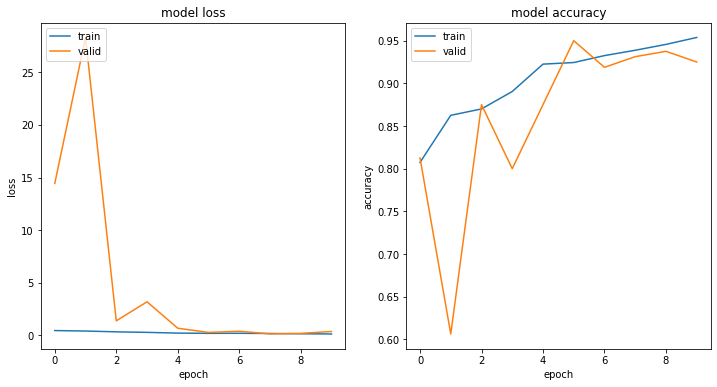

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

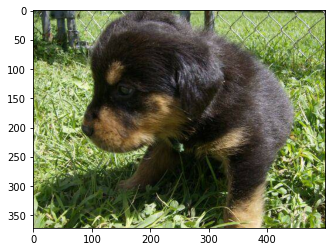

ValueError: in user code:

    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\crims\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:267 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_4: expected shape=(None, 150, 150, 3), found shape=(None, 224, 224, 3)


In [34]:
# Predicting images

n = r.randint(1,2022)
filenames = test_data.filenames
path = f'C:/Users/crims/Tensorflow/Practice/cats-v-dogs/testing/{filenames[n]}'
pic = mpimg.imread(path)
plt.imshow(pic)
plt.show()

img = tf.keras.preprocessing.image.load_img(path, target_size=(Height, Width))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_processed = tf.keras.applications.resnet50.preprocess_input(img_batch)


#saved_model = tf.keras.models.load_model('resnet50_catvdogmodel')
classifications = xception.predict(img_preprocessed)

#predict = resnet50.predict(img_preprocessed)

print(classifications)

if classifications[0]>0.5:
    print(path + " is a dog")
else:
    print(path + " is a cat")